# Gain margin
The gain margin is defined as $-20 log_{10}(\mid P(j\omega_{\pi})C(j\omega_{\pi}) \mid)$ with $\omega_{\pi}$ the phase for which $P(j\omega)C(j\omega)$ passes through -180° i.e. the amount of extra gain you can allow before instability occurs.
<img src="Afbeelding19.png">

## How to see gain margin on bode plot
Determine at which frequency($\omega$) the phase of $P(j\omega)C(j\omega)$ becomes -180°. Determine at that frequency the magnitude. The difference between that magnitude and 0db is the gain margin.


C:\Anaconda\lib\site-packages\control-0.6d-py2.7.egg\control\freqplot.py:124: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Anaconda\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0



          1
---------------------
s^3 + 2 s^2 + 2 s + 1



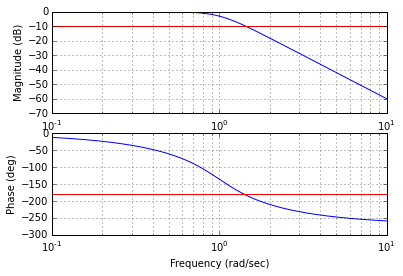

The gain margin of this system is -9.5 dB 


In [1]:
from ProportionalControllerDemo2 import *
%matplotlib inline
# Enter the numerator
num = [1]
# Enter the denominator
den = [1,2,2,1]
# Makes a transfer function with the given numerator and denominator
TF = control.TransferFunction(num,den)
print TF
# Makes a system with the given transfer function
sys = control.tf(num,den)
# Calculate gain margin, phase margin, frequency at which the amplitude 
# of P(jw)C(jw) becomes 0 db, frequency at which the phase of P(jw)C(jw) becomes -180°
gm, pm, Wcg, Wcp = control.margin(sys)
# Draws bode plot of given function
control.bode(TF,dB=True,omega=np.linspace(10**-1,10,1000))
if (gm != None):
    draw_lines(gm, pm, Wcg, Wcp)
show()
print "The gain margin of this system is %s dB "  % round(20*log10(gm),1) if gm != None else "The gain margin of this system is infinity "

## How to see the gain margin on Nyquist Plot
Determine the intersection of the x-axis and the Nyquist-plot.Lets call a the distance between this intersect and the origin.  The gain margin is the $ 20 log_{10}(1/a) = - 20 log_{10}(a) $ . 


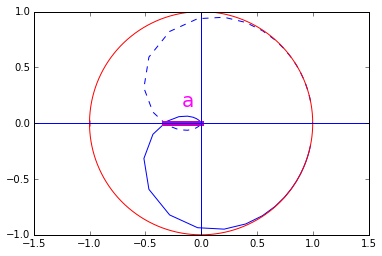

In [2]:
# Draw Nyquist plot
control.nyquist(sys)
plt.axis('equal')
if gm != None:
    plt.plot([0,-1/gm],[0,0],'m',linewidth=5)
    ax = plt.subplot(1,1,1)
    ax.text(-1/(2*gm),0.15,'a',fontsize=20,color='magenta')
# Draw unit circle and x and y axis
draw_unit_circle()
show()